# 13. Based on multiple features/variables perform Linear Regression. For example, based on a number of additional features like number of bedrooms, servant room, number of balconies,number of houses of years a house has been built – predict the price of a house.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('/content/homeprice.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
df.head()

,Area,Bedrooms,Age,Price
0,428.635645,5,15,21625.615922
1,755.488839,2,1,37095.019710
2,662.634921,3,3,33020.292816
3,199.079204,2,20,8888.712606
4,838.612265,5,2,42581.546034


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
print(len(X_train),len(y_train),  len(X_test), len(y_test))

40 40 10 10


In [5]:
class MultipleLayerFeatureLinearRegression:
    def __init__(self):
         self.coef_ = None
         self.intercept_ = None
         
    def fit(self,X_train,y_train):
         X_train = np.insert(X_train,0,1,axis=1)
         
         # calcuate the coeffs
         betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
         self.intercept_ = betas[0]
         self.coef_ = betas[1:]
         print('Intercept is ',self.intercept_,' Cofficient are ',self.coef_)
     
    def predict(self,X_test):
         y_pred = np.dot(X_test,self.coef_) + self.intercept_
         return y_pred

In [6]:
model = MultipleLayerFeatureLinearRegression()
model.fit(X_train, y_train)

Intercept is  48.33983123107282  Cofficient are  [ 50.03920782 139.40047365 -72.85144255]


In [7]:
y_pred = model.predict(X_test)

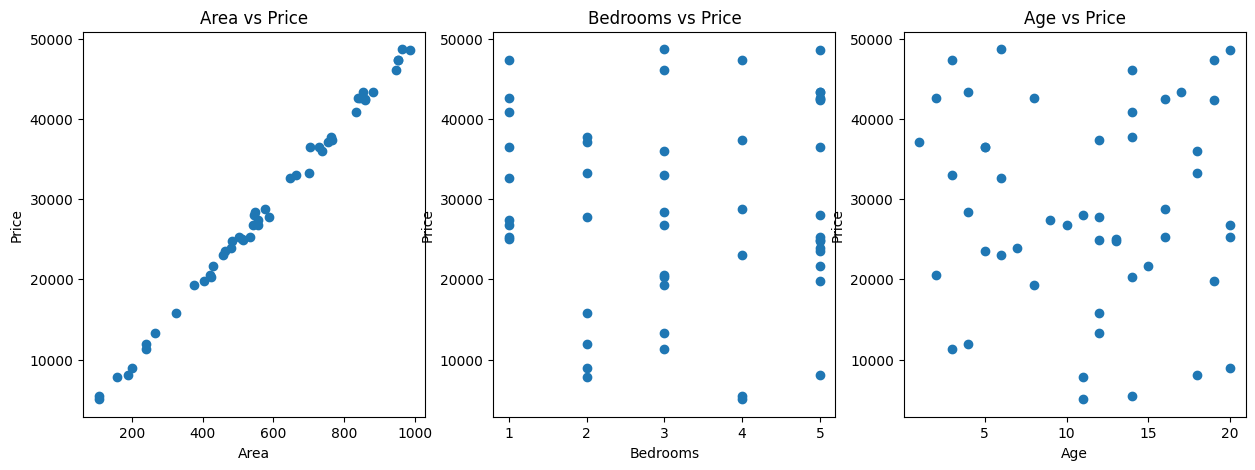

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(df['Area'], df['Price'])
ax1.set_xlabel('Area')
ax1.set_ylabel('Price')
ax1.set_title('Area vs Price')

ax2.scatter(df['Bedrooms'], df['Price'])
ax2.set_xlabel('Bedrooms')
ax2.set_ylabel('Price')
ax2.set_title('Bedrooms vs Price')

ax3.scatter(df['Age'], df['Price'])
ax3.set_xlabel('Age')
ax3.set_ylabel('Price')
ax3.set_title('Age vs Price')

plt.show()

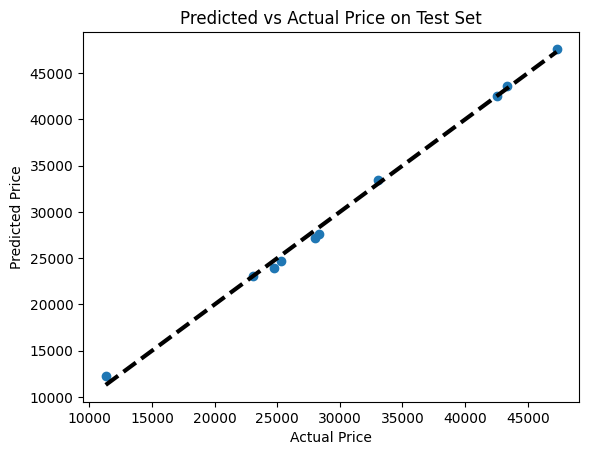

In [9]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Price on Test Set')

# Display the plot
plt.show()